In [1]:
import Functions 
from PIL import Image, ImageFilter
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy import ndimage
from scipy.stats import randint, uniform, skew, kurtosis
import torch
import torch.nn.functional as F
from sklearn.decomposition import PCA
import joblib

In [2]:
excel_file = "data.csv"
folder_path = "test_data"

In [3]:
images, file_names = Functions.load_images_from_folder(folder_path)


df_excel = pd.read_csv(excel_file, usecols=["Patient", "histological_type"])
df_excel = df_excel.dropna()

print(f"{len(images)} adet resim yüklendi.")

100 adet resim yüklendi.


In [4]:
df_list = []

for img_bgr, file_name in zip(images, file_names):
    try:
        texture_feats = Functions.glcm(img_bgr)
        hog_hist = Functions.hog(img_bgr)
        lbp_img = Functions.lbp(img_bgr)
        lbp_hist = Functions.lbp_histogram(lbp_img)
        glcm_matrix = Functions.glcm_matr(img_bgr, distance=1, angle=0)
        glcm_feats = Functions.glcm_features(glcm_matrix)

        label = df_excel.loc[df_excel["Patient"] == str(file_name[:12]), "histological_type"].values[0]

        df = Functions.features_to_dataframe(
            histological_type=label,
            patient=file_name,
            texture_feats=texture_feats,
            hog_hist=hog_hist,
            lbp_hist=lbp_hist,
            glcm_feats=glcm_feats
        )

        df_list.append(df)
    except:
        pass

final_df = pd.concat(df_list, ignore_index=True)


In [5]:
X = final_df.iloc[:, 2:].values 
pca = joblib.load("modeller/pca_model.pkl")

X_train_pca = pca.transform(X)
y = final_df['histological_type']

## İstenilen Modeli Seçerek, Test Veri Setinizde Kullanabilirsiniz


MLP Results:
  Accuracy: 0.9600
  Recall (macro): 0.9598
  F1-Score (macro): 0.9602


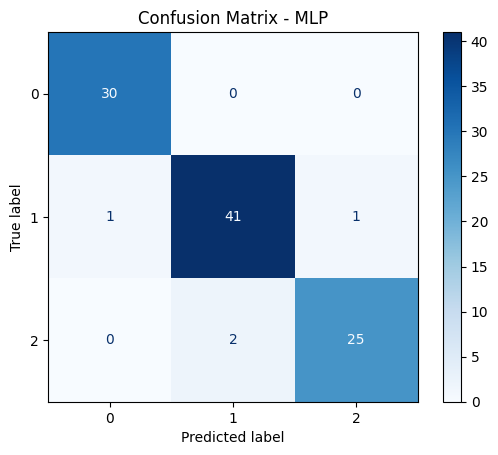

  AUC (micro-average): 0.9957


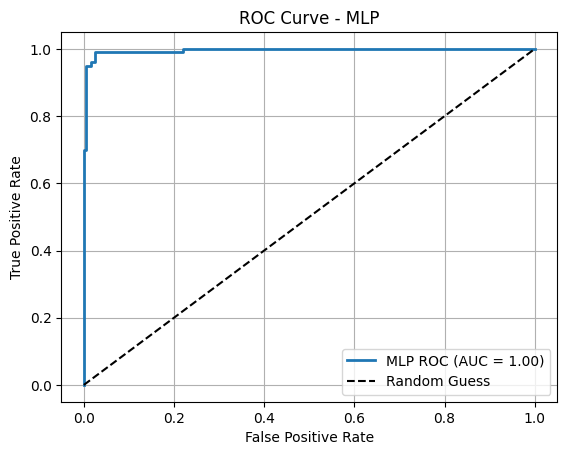

In [6]:
loaded_model = joblib.load("modeller/mlp_model.sav")

Functions.evaluate_model("MLP", loaded_model, X_train_pca, y)